In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_colwidth', None)  # Show full content in each cell
pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)   # Show all columns


sourceDf = pd.read_csv("./data/Europe-Central-Asia_2018-2024_Sep27.csv")
sourceDf["notes"] = sourceDf["notes"].str.strip()
unique_sub_event = sourceDf['sub_event_type'].unique()
unique_sub_event = np.sort(unique_sub_event)
print(unique_sub_event)

non_war_related_event  = [
    'Agreement',
    'Arrests',
    'Mob violence',
    'Excessive force against protesters',
    'Peaceful protest',
    'Protest with intervention',
    'Sexual violence',
    'Violent demonstration',
    'Looting/property destruction'
]

war_related_event =  [event for event in unique_sub_event if event not in non_war_related_event]

['Abduction/forced disappearance' 'Agreement' 'Air/drone strike'
 'Armed clash' 'Arrests' 'Attack' 'Change to group/activity'
 'Disrupted weapons use' 'Excessive force against protesters'
 'Government regains territory' 'Grenade'
 'Headquarters or base established' 'Looting/property destruction'
 'Mob violence' 'Non-state actor overtakes territory'
 'Non-violent transfer of territory' 'Other' 'Peaceful protest'
 'Protest with intervention' 'Remote explosive/landmine/IED'
 'Sexual violence' 'Shelling/artillery/missile attack' 'Suicide bomb'
 'Violent demonstration']


In [3]:
project_related_event = [
    'Armed clash',
    'Shelling/artillery/missile attack'
]

ukraine_russia_events = sourceDf[(sourceDf["country"] == "Ukraine") | (sourceDf["country"] == "Russia")]
ukraine_war_events = ukraine_russia_events[ukraine_russia_events["sub_event_type"].isin(project_related_event)]

print("total relevant event count:", ukraine_russia_events.size)
print("total war related event count:",ukraine_war_events.size)
print("total war fatalities:", ukraine_war_events["fatalities"].sum())
print("min date:", ukraine_russia_events["event_date"].min())
print("max date:", ukraine_russia_events["event_date"].max())

total relevant event count: 6480798
total war related event count: 4722726
total war fatalities: 107361
min date: 2018-01-01
max date: 2024-09-27


In [4]:
count_by_event_type = ukraine_war_events.groupby("sub_event_type").size()
print(count_by_event_type)

sub_event_type
Armed clash                           49467
Shelling/artillery/missile attack    102879
dtype: int64


In [5]:
len(ukraine_war_events)

152346

In [6]:
ukraine_war_events.size, len(ukraine_war_events.columns)*len(ukraine_war_events)

(4722726, 4722726)

In [7]:
ukraine_war_events['event_date'] = pd.to_datetime(ukraine_war_events['event_date'])

/var/folders/m1/y50gr9tn5796vpljdx0my4sc0000gn/T/ipykernel_5961/1919086019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukraine_war_events['event_date'] = pd.to_datetime(ukraine_war_events['event_date'])


Actor Nationality

In [8]:
ukraine_war_events['actor1_ntnlty'] = np.where(ukraine_war_events['actor1'].str.upper().str.contains('RUSSIA'), 'RUSSIA',
                                           np.where(ukraine_war_events['actor1'].str.upper().str.contains('UKRAINE'), 'UKRAINE', 'OTHER'))
ukraine_war_events['actor2_ntnlty'] = np.where(ukraine_war_events['actor2'].str.upper().str.contains('RUSSIA'), 'RUSSIA',
                                           np.where(ukraine_war_events['actor2'].str.upper().str.contains('UKRAINE'), 'UKRAINE', 'OTHER'))

ukraine_war_events['actor1_ntnlty'] = np.where(ukraine_war_events['actor1'].isna(), 'NO_ACTOR', ukraine_war_events['actor1_ntnlty'])
ukraine_war_events['actor2_ntnlty'] = np.where(ukraine_war_events['actor2'].isna(), 'NO_ACTOR', ukraine_war_events['actor2_ntnlty'])

/var/folders/m1/y50gr9tn5796vpljdx0my4sc0000gn/T/ipykernel_5961/3036330648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukraine_war_events['actor1_ntnlty'] = np.where(ukraine_war_events['actor1'].str.upper().str.contains('RUSSIA'), 'RUSSIA',
/var/folders/m1/y50gr9tn5796vpljdx0my4sc0000gn/T/ipykernel_5961/3036330648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ukraine_war_events['actor2_ntnlty'] = np.where(ukraine_war_events['actor2'].str.upper().str.contains('RUSSIA'), 'RUSSIA',
/var/folders/m

In [9]:
ukraine_war_events[ukraine_war_events['actor1_ntnlty'] == 'OTHER'].groupby(['actor1']).size()

actor1
Atesh                                          3
NAF: United Armed Forces of Novorossiya    20199
Right Sector                                   3
Unidentified Armed Group (Kyrgyzstan)          1
Unidentified Armed Group (Moldova)             1
Unidentified Military Forces                  66
Wagner Group                                  78
dtype: int64

In [10]:
ukraine_war_events[ukraine_war_events['actor2_ntnlty'] == 'OTHER'].groupby(['actor2']).size()

actor2
Civilians (Canada)                             1
Civilians (France)                             1
Civilians (International)                      6
Civilians (Italy)                              1
Civilians (Poland)                             1
Civilians (Portugal)                           1
Donetsk People's Republic - Police             1
IK: Caucasus Emirate                           1
Luhansk People's Republic - Police             2
Militia (Kharachinsky)                         1
NAF: United Armed Forces of Novorossiya    19300
Right Sector                                   3
Wagner Group                                   8
dtype: int64

In [11]:
# hard coded
ukraine_war_events.loc[ukraine_war_events['actor1'] == 'Atesh', 'actor1_ntnlty'] = 'UKRAINE'
ukraine_war_events.loc[ukraine_war_events['actor1'] == 'NAF: United Armed Forces of Novorossiya', 'actor1_ntnlty'] = 'RUSSIA'
ukraine_war_events.loc[ukraine_war_events['actor1'] == 'Wagner Group', 'actor1_ntnlty'] = 'RUSSIA'
ukraine_war_events.loc[ukraine_war_events['actor1'] == 'Right Sector', 'actor1_ntnlty'] = 'UKRAINE'

ukraine_war_events.loc[ukraine_war_events['actor2'] == 'NAF: United Armed Forces of Novorossiya', 'actor2_ntnlty'] = 'RUSSIA'
ukraine_war_events.loc[ukraine_war_events['actor2'] == 'Militia (Kharachinsky)  ', 'actor2_ntnlty'] = 'RUSSIA'
ukraine_war_events.loc[ukraine_war_events['actor2'] == 'Wagner Group', 'actor2_ntnlty'] = 'RUSSIA'
ukraine_war_events.loc[ukraine_war_events['actor2'] == 'Right Sector', 'actor2_ntnlty'] = 'UKRAINE'

In [12]:
# russia-russia on shelling attack
ukraine_war_events.groupby(['sub_event_type', 'actor1_ntnlty', 'actor2_ntnlty']).size()

sub_event_type                     actor1_ntnlty  actor2_ntnlty
Armed clash                        OTHER          RUSSIA               1
                                                  UKRAINE              1
                                   RUSSIA         OTHER                2
                                                  RUSSIA             196
                                                  UKRAINE          33290
                                   UKRAINE        RUSSIA           15888
                                                  UKRAINE             89
Shelling/artillery/missile attack  OTHER          NO_ACTOR            41
                                                  OTHER                1
                                                  RUSSIA               8
                                                  UKRAINE             16
                                   RUSSIA         NO_ACTOR         56903
                                                  OTHER     

In [13]:
ukraine_war_events[ukraine_war_events['actor1_ntnlty'] == ukraine_war_events['actor2_ntnlty']][['notes', 'sub_event_type','actor1', 'actor2']].head(10)

,notes,sub_event_type,actor1,actor2
405,"Around 26 September 2024 (as reported), according to the Russian sources, Ukrainian forces using a anti-tank guided missiles (likely shoulder fired) struck other Ukrainian forces, that were attempting to surrender by flying the white flag on the APC near the village of Veseloe (Glushkovskiy, Kursk). The APC was destroyed. Casualties unknown.",Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),Military Forces of Ukraine (2019-)
3035,"On 18 September 2024, private security of a Russian businessmen exchanged fire with private security of the business center 'Romanov Dvor' in Moscow - Central (Tsentralnyy, Moscow). The husband of the company's founder and 20-30 armed men including his security guards, several 'guns for hire', martial artists, and the deputy commander of the national guard battalion 'Akhmat-1' from Chechnya tried to illegally enter the office of the major Russian online retail company 'Wildberries'. In July, the attacker, husband of the company owner turned to the Head of Chechnya Ramzan Kadyrov for help in stopping the upcoming merger that the man thought was a mistake. Ramzan Kadyrov in turn, promised to 'do everything to fix the situation'. 2 people died and 10 people (including 3 police officers who attempted to break up the gun fight) were injured.",Armed clash,Private Security Forces (Russia),Private Security Forces (Russia)
4869,"On 12 September 2024, according to Russian sources, Ukrainian Forces shelled a crushed stone quarry near occupied Volnovakha, Donetsk. 3 civilians were killed.",Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),Civilians (Ukraine)
7284,"On 3 September 2024, an individual armed with a screwdriver attacked the police post near Magas (Magas, Republic of Ingushetia). Officers shot the attacker, killing him. 1 police officer was injured.",Armed clash,Unidentified Armed Group (Russia),Police Forces of Russia (2000-)
7285,"Around 3 September 2024 (as reported), servicemen from the Russian Territorial Defense Forces opened fire on the members of the Chechen Battalion that they suspectedly mistook for the Ukrainian sabotage and recon mobile group in the Kursk Region (coded as Kursk (Kursk)). 2 soldiers were injured.",Armed clash,Military Forces of Russia (2000-) Territorial Defense Forces,Military Forces of Russia (2000-) Chechen Battalion of Ramzan Kadyrov
9255,"On 27 August 2024, a Ukrainian serviceman was injured after an unknown armed man shot at the military enlistment office in Lutsk, Volyn.",Armed clash,Unidentified Armed Group (Ukraine),Military Forces of Ukraine (2019-)
10589,"On 22 August 2024, Ukrainian forces shelled an unidentified target (coded as 1st Donetsk Army Corps) in Horlivka, Donetsk. Four civilians were wounded.",Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),Civilians (Ukraine)
13016,"On 13 August 2024, Ukrainian military forces shelled Lysychansk, Luhansk. According to Russian sources, a bus was hit, 1 civilian was killed and 28 others were wounded.",Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),Civilians (Ukraine)
13937,"On 9 August 2024, an individual opened fire on 2 policemen that stopped him for a document check on the road between Khasavyurt and Tloh (coded as Buynaksk (Buynaksk, Republic of Dagestan)). The motives for this are unknown, however the case could be connected to the ongoing 'counter-terrorism' operations in the region. 2 policemen were injured.",Armed clash,Unidentified Armed Group (Russia),Police Forces of Russia (2000-)
15306,"On 4 August 2024, Ukrainian forces shelled Russian positions (coded as DPR) in Donetsk - Petrovskyi. 1 civilian was injured.",Shelling/artillery/missile attack,Military Forces of Russia (2000-),Military Forces of Russia (2000-) 1st Donetsk Army Corps


In [14]:
ukraine_war_events[ukraine_war_events['actor1_ntnlty'] != ukraine_war_events['actor2_ntnlty']][['notes', 'sub_event_type', 'actor1_ntnlty']].head(10)

,notes,sub_event_type,actor1_ntnlty
70,"On 27 September 2024, militants from the Chechen Battalion 'Akhmat' attacked the Ukrainian UAV control center to the north of Martynovka (Sudzhanskiy, Kursk). According to the commander of the battalion, the center and the military personnel at the center were 'destroyed'. Unspecified number of fatalities coded as 10.",Armed clash,RUSSIA
81,"On 27 September 2024, Ukrainian military shelled with (likely) artillery the village of Rzhevka (Shebekinskiy, Belgorod). No casualties, on the territory of the agricultural enterprise 2 grain silos, 1 weighing building, 1 administrative building and 1 truck were damaged.",Shelling/artillery/missile attack,UKRAINE
96,"On 27 September 2024, Ukrainian military shelled 1 time with 4 (likely) artillery shells the village of Shakhovka (Volokonovskiy, Belgorod). No casualties.",Shelling/artillery/missile attack,UKRAINE
103,"On 27 September 2024, Ukrainian military shelled 1 time with 6 (likely) artillery shells the village of Kolotilovka (Krasnoyaruzhskiy, Belgorod). No casualties.",Shelling/artillery/missile attack,UKRAINE
114,"On 27 September 2024, Russian forces, supported by artillery and aviation, engaged in battles with Ukrainian forces multiple times in the area around Lyubimovka (Korenevskiy, Kursk). According to the Russian MoD, Russian troops defeated Ukrainian troops from mechanized, tank, marine, airborne assault, national guard and territorial defense brigades of the Armed Forces of Ukraine, and that on 27 September during battles near Lyubimovka, Darino, Nikolayevo-Daryino, Plekhovo, Ukrainian military losses amounted to 30 servicemen as killed and wounded, as well 4 armored vehicles and 1 car. 1 servicemen also surrendered. [Russian MoD reported 30 fatalities. Coded as 10 fatalities split across 4 events. 3 fatalities coded to this event].",Armed clash,RUSSIA
115,"On 27 September 2024, Russian forces, supported by artillery and aviation, engaged in battles with Ukrainian forces in and around Darino (Sudzhanskiy, Kursk). According to the Russian MoD, Russian troops defeated Ukrainian troops from mechanized, tank, marine, airborne assault, national guard and territorial defense brigades of the Armed Forces of Ukraine, and that on 27 September during battles near Lyubimovka, Darino, Nikolayevo-Daryino, Plekhovo, Ukrainian military losses amounted to 30 servicemen as killed and wounded, as well 4 armored vehicles and 1 car. 1 servicemen also surrendered. [Russian MoD reported 30 fatalities. Coded as 10 fatalities split across 4 events. 3 fatalities coded to this event].",Armed clash,RUSSIA
116,"On 27 September 2024, Russian forces, supported by artillery and aviation, engaged in battles with Ukrainian forces multiple times in the area around Novyi Put (Glushkovskiy, Kursk). According to the Russian MoD, on 27 September, during battles near Medvezhye (coded separately) and Novyi Put, Ukrainian military losses amounted to 70 servicemen as killed and wounded, as well as 7 armored vehicles and 3 cars. 2 servicemen also surrendered. [Russian MoD reported 70 fatalities. Coded as 10 fatalities split across 2 events. 5 fatalities coded to this event].",Armed clash,RUSSIA
117,"On 27 September 2024, Russian forces engaged in battles with Ukrainian forces in the area around Nikolayevo-Daryino (Sudzhanskiy, Kursk). According to the Russian MoD, Russian troops defeated Ukrainian troops from mechanized, tank, marine, airborne assault, national guard and territorial defense brigades of the Armed Forces of Ukraine, and that on 27 September during battles near Lyubimovka, Darino, Nikolayevo-Daryino, Plekhovo, Ukrainian military losses amounted to 30 servicemen as killed and wounded, as well 4 armored vehicles and 1 car. 1 servicemen also surrendered. [Russian MoD reported 30 fatalities. Coded as 10 fatalities split across 4 events. 2 fatalities coded to this event].",Armed clash,RUSSIA
118,"On 27 September 2024, Russian forces engaged in battles with Ukrainian f

Armed clash

In [15]:
# armed clash
armed_clash_df = ukraine_war_events[ukraine_war_events['sub_event_type'] == 'Armed clash']
# armed_clash_df[:10]

<Axes: xlabel='event_date'>

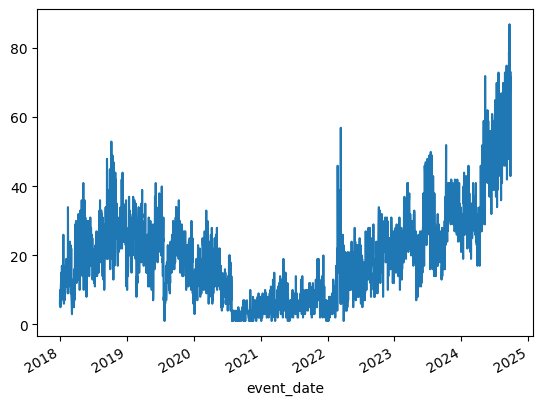

In [16]:
events_count = armed_clash_df.groupby('event_date').size()
events_count.plot(kind='line')

/var/folders/m1/y50gr9tn5796vpljdx0my4sc0000gn/T/ipykernel_5961/3319350343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  armed_clash_df['event_month'] = armed_clash_df['event_date'].dt.to_period('M')


<Axes: xlabel='event_month'>

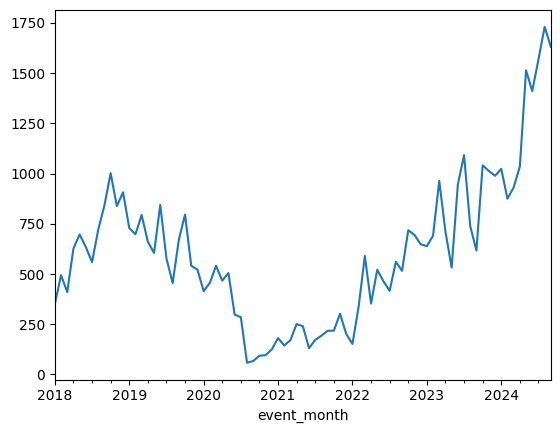

In [17]:
# monthly level
armed_clash_df['event_month'] = armed_clash_df['event_date'].dt.to_period('M')
events_count_per_month = armed_clash_df.groupby('event_month').size()
events_count_per_month.plot(kind='line')

In [31]:
# date, location, fatalities are very accurate
# look for any support
# armed_clash_df[['actor1_ntnlty', 'actor2_ntnlty', 'location', 'country', 'fatalities', "notes"]].head(500)

In [32]:
# russian loss
# idx 413: loss of actor 1
# armed_clash_df[armed_clash_df['actor2_ntnlty'] == 'RUSSIA'][['event_date', 'fatalities', 'notes']].head(100)

In [20]:
armed_clash_df['is_supported'] = armed_clash_df['notes'].str.lower().str.contains('supported')
armed_clash_df.groupby('is_supported')['fatalities'].describe()

/var/folders/m1/y50gr9tn5796vpljdx0my4sc0000gn/T/ipykernel_5961/1983998873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  armed_clash_df['is_supported'] = armed_clash_df['notes'].str.lower().str.contains('supported')


,count,mean,std,min,25%,50%,75%,max
is_supported,,,,,,,,
False,48050.0,1.579001,10.604386,0.0,0.0,0.0,0.0,600.0
True,1417.0,3.045166,9.362486,0.0,0.0,1.0,3.0,263.0


In [21]:
# outlier checking
armed_clash_df[armed_clash_df['fatalities'] == 600][['notes', 'fatalities']]

,notes,fatalities
162614,"On 26 January 2023, Ukrainian military forces repelled a Russian attack in the area of Bakhmut, Donetsk. According to Ukrainian sources, 600-700 Russian servicemen were killed during the day.",600


In [22]:
len(armed_clash_df[armed_clash_df['notes'].str.lower().str.contains('shelling')])

444

In [33]:
# armed_clash_df[armed_clash_df['notes'].str.lower().str.contains('shelling')].head(10)[['notes', 'fatalities']]

In [24]:
armed_clash_df['is_shelling'] = armed_clash_df['notes'].str.lower().str.contains('shelling')
armed_clash_df.groupby('is_shelling')['fatalities'].describe()

/var/folders/m1/y50gr9tn5796vpljdx0my4sc0000gn/T/ipykernel_5961/81376991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  armed_clash_df['is_shelling'] = armed_clash_df['notes'].str.lower().str.contains('shelling')


,count,mean,std,min,25%,50%,75%,max
is_shelling,,,,,,,,
False,49023.0,1.544663,10.187184,0.0,0.0,0.0,0.0,600.0
True,444.0,10.049550,30.461718,0.0,0.0,1.0,5.0,450.0


In [84]:
# extract number of item losses
# can't guaranteee it's the loss of which side

# dont need this anymore, these data can be found on the spreadsheet/ do it just as a back-up
keywords = ['vehicle', 'armored_vehicle', 'car', 'boat', 'drone', 'cannon', 'uav', 'mortar']
# create columns
for e in keywords:
    armed_clash_df[f'{e}_losses'] = 0

# equipment losses
for idx, r in armed_clash_df.iterrows():
    notes = r.notes.lower()
    tmp_list = notes.split(' ')
    for i in range(len(tmp_list)):
        for e in keywords: 
            if e in tmp_list[i]: # keyword detected
                if tmp_list[i-1] == 'armored' and 'vehicle' in tmp_list[i]: # armored vehicle detected
                    item = 'armored_vehicle'
                else:
                    item = e
                n_loss = 0
                for j in range(1,4): # moves back 4 idx
                    if tmp_list[i-j].isdigit():
                        n_loss = int(tmp_list[i-j])
                        break
                    elif tmp_list[i-j] in ['a', 'an']:
                        n_loss = 1
                        break
                armed_clash_df.at[idx, f'{item}_losses'] += n_loss

# supported
support_types = ['air_forces', 'artillery', 'aviation', 'air_units']
# ensure if this is close by the word 'supported, have to perform indexing
# create columns
for e in support_types:
    armed_clash_df[f'{e}_supported'] = False

for idx, r in armed_clash_df[armed_clash_df['is_supported'] == True].iterrows():
    notes = r.notes.lower()
    tmp_list = notes.split(' ')
    for i in range(len(tmp_list)):
        if tmp_list[i] == 'supported':
            quota = min(5, len(tmp_list)-(i+1)) # scanning next 5 words
            pointer = i+1
            while quota > 0:
                if 'artillery' in tmp_list[pointer]:
                    armed_clash_df.at[idx, f'artillery_supported'] = True
                    quota = min(5, len(tmp_list)-(pointer+1))
                elif 'aviation' in tmp_list[pointer]:
                    armed_clash_df.at[idx, f'aviation_supported'] = True
                    quota = min(5, len(tmp_list)-(pointer+1))
                elif 'air' in tmp_list[pointer] and 'force' in tmp_list[pointer+1]:
                    armed_clash_df.at[idx, 'air_forces_supported'] = True
                    quota = min(5, len(tmp_list)-(pointer+1))
                elif 'air' in tmp_list[pointer] and 'unit' in tmp_list[pointer+1]:
                    armed_clash_df.at[idx, 'air_units_supported'] = True
                    quota = min(5, len(tmp_list)-(pointer+1))
                else:
                    quota -= 1
                pointer += 1



/var/folders/m1/y50gr9tn5796vpljdx0my4sc0000gn/T/ipykernel_5961/2672289796.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  armed_clash_df[f'{e}_losses'] = 0
/var/folders/m1/y50gr9tn5796vpljdx0my4sc0000gn/T/ipykernel_5961/2672289796.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  armed_clash_df[f'{e}_supported'] = False


In [65]:
selected_cols = [
    'event_date',
    'event_id_cnty',
    'actor1_ntnlty', 'actor2_ntnlty', 'event_month',
    'is_supported', 'is_shelling', 'vehicle_losses',
    'armored_vehicle_losses', 'car_losses', 'boat_losses', 'drone_losses',
    'cannon_losses', 'uav_losses', 'mortar_losses', 'air_forces_supported',
    'artillery_supported', 'aviation_supported', 'air_units_supported',
    'notes'
]

In [82]:
# quality checking
armed_clash_df[armed_clash_df['is_supported'] == True][selected_cols[-5:]].head(50)

,air_forces_supported,artillery_supported,aviation_supported,air_units_supported,notes
114,False,True,True,False,"On 27 September 2024, Russian forces, supported by artillery and aviation, engaged in battles with Ukrainian forces multiple times in the area around Lyubimovka (Korenevskiy, Kursk). According to the Russian MoD, Russian troops defeated Ukrainian troops from mechanized, tank, marine, airborne assault, national guard and territorial defense brigades of the Armed Forces of Ukraine, and that on 27 September during battles near Lyubimovka, Darino, Nikolayevo-Daryino, Plekhovo, Ukrainian military losses amounted to 30 servicemen as killed and wounded, as well 4 armored vehicles and 1 car. 1 servicemen also surrendered. [Russian MoD reported 30 fatalities. Coded as 10 fatalities split across 4 events. 3 fatalities coded to this event]."
115,False,True,True,False,"On 27 September 2024, Russian forces, supported by artillery and aviation, engaged in battles with Ukrainian forces in and around Darino (Sudzhanskiy, Kursk). According to the Russian MoD, Russian troops defeated Ukrainian troops from mechanized, tank, marine, airborne assault, national guard and territorial defense brigades of the Armed Forces of Ukraine, and that on 27 September during battles near Lyubimovka, Darino, Nikolayevo-Daryino, Plekhovo, Ukrainian military losses amounted to 30 servicemen as killed and wounded, as well 4 armored vehicles and 1 car. 1 servicemen also surrendered. [Russian MoD reported 30 fatalities. Coded as 10 fatalities split across 4 events. 3 fatalities coded to this event]."
116,False,True,True,False,"On 27 September 2024, Russian forces, supported by artillery and aviation, engaged in battles with Ukrainian forces multiple times in the area around Novyi Put (Glushkovskiy, Kursk). According to the Russian MoD, on 27 September, during battles near Medvezhye (coded separately) and Novyi Put, Ukrainian military losses amounted to 70 servicemen as killed and wounded, as well as 7 armored vehicles and 3 cars. 2 servicemen also surrendered. [Russian MoD reported 70 fatalities. Coded as 10 fatalities split across 2 events. 5 fatalities coded to this event]."
119,False,True,True,False,"On 27 September 2024, Russian forces, supported by artillery and aviation, engaged in battles with Ukrainian forces multiple times in the area around Medvezhye (Glushkovskiy, Kursk). According to the Russian MoD, on 27 September, during battles near Medvezhye and Novyi Put (coded separately), Ukrainian military losses amounted to 70 servicemen as killed and wounded, as well as 7 armored vehicles and 3 cars. 2 servicemen also surrendered. [Russian MoD reported 70 fatalities. Coded as 10 fatalities split across 2 events. 5 fatalities coded to this event]."
408,False,True,True,False,"On 26 September 2024, Russian forces, supported by artillery and aviation, engaged in battles with Ukrainian forces in the area of Lyubimovka (Korenevskiy, Kursk). According to the Russian MoD, Russian troops defeated Ukrainian troops from mechanized, tank, airborne assault, marine, and territorial defense brigades of the Armed Forces of Ukraine, and that during 26 September Ukrainian military's losses amounted to more than 340 servicemen, as well as armored vehicles and military equipment, including in Lyubimovka, Darino, Nikolayevo-Daryino, Plekhovo, Bogdanovka, Guevo, Kruglenkoe, Kubatkin, Knyazhiy Pervyi, Kositsa, Martynovka, Makhnovka, Novaya Sorochina, Novoivanovka, Orlovka, Tolstyi Lug, Yuzhnyi, Veseloe. [Russian MoD reported 340 fatalities. Coded as 10 fatalities split across 18 events. 1 fatality coded to this event]."
409,False,True,True,False,"On 26 September 2024, Russian forces, supported by artillery and aviation, engaged in battles with Ukrainian forces in the area of Darino (Sudzhanskiy, Kursk). According to the Russian MoD, Russian troops defeated Ukrainian troops from mechanized, tank, airborne assault, marine, and territorial defense brigades of the Armed Force

In [78]:
selected_cols

['event_date',
 'event_id_cnty',
 'actor1_ntnlty',
 'actor2_ntnlty',
 'event_month',
 'is_supported',
 'is_shelling',
 'vehicle_losses',
 'armored_vehicle_losses',
 'car_losses',
 'boat_losses',
 'drone_losses',
 'cannon_losses',
 'uav_losses',
 'mortar_losses',
 'air_forces_supported',
 'artillery_supported',
 'aviation_supported',
 'air_units_supported',
 'notes']

In [85]:
armed_clash_df[['vehicle_losses','armored_vehicle_losses','car_losses','boat_losses','drone_losses','cannon_losses','uav_losses','mortar_losses','notes']].head(50)

,vehicle_losses,armored_vehicle_losses,car_losses,boat_losses,drone_losses,cannon_losses,uav_losses,mortar_losses,notes
70,0,0,0,0,0,0,0,0,"On 27 September 2024, militants from the Chechen Battalion 'Akhmat' attacked the Ukrainian UAV control center to the north of Martynovka (Sudzhanskiy, Kursk). According to the commander of the battalion, the center and the military personnel at the center were 'destroyed'. Unspecified number of fatalities coded as 10."
114,0,4,1,0,0,0,0,0,"On 27 September 2024, Russian forces, supported by artillery and aviation, engaged in battles with Ukrainian forces multiple times in the area around Lyubimovka (Korenevskiy, Kursk). According to the Russian MoD, Russian troops defeated Ukrainian troops from mechanized, tank, marine, airborne assault, national guard and territorial defense brigades of the Armed Forces of Ukraine, and that on 27 September during battles near Lyubimovka, Darino, Nikolayevo-Daryino, Plekhovo, Ukrainian military losses amounted to 30 servicemen as killed and wounded, as well 4 armored vehicles and 1 car. 1 servicemen also surrendered. [Russian MoD reported 30 fatalities. Coded as 10 fatalities split across 4 events. 3 fatalities coded to this event]."
115,0,4,1,0,0,0,0,0,"On 27 September 2024, Russian forces, supported by artillery and aviation, engaged in battles with Ukrainian forces in and around Darino (Sudzhanskiy, Kursk). According to the Russian MoD, Russian troops defeated Ukrainian troops from mechanized, tank, marine, airborne assault, national guard and territorial defense brigades of the Armed Forces of Ukraine, and that on 27 September during battles near Lyubimovka, Darino, Nikolayevo-Daryino, Plekhovo, Ukrainian military losses amounted to 30 servicemen as killed and wounded, as well 4 armored vehicles and 1 car. 1 servicemen also surrendered. [Russian MoD reported 30 fatalities. Coded as 10 fatalities split across 4 events. 3 fatalities coded to this event]."
116,0,7,3,0,0,0,0,0,"On 27 September 2024, Russian forces, supported by artillery and aviation, engaged in battles with Ukrainian forces multiple times in the area around Novyi Put (Glushkovskiy, Kursk). According to the Russian MoD, on 27 September, during battles near Medvezhye (coded separately) and Novyi Put, Ukrainian military losses amounted to 70 servicemen as killed and wounded, as well as 7 armored vehicles and 3 cars. 2 servicemen also surrendered. [Russian MoD reported 70 fatalities. Coded as 10 fatalities split across 2 events. 5 fatalities coded to this event]."
117,0,4,1,0,0,0,0,0,"On 27 September 2024, Russian forces engaged in battles with Ukrainian forces in the area around Nikolayevo-Daryino (Sudzhanskiy, Kursk). According to the Russian MoD, Russian troops defeated Ukrainian troops from mechanized, tank, marine, airborne assault, national guard and territorial defense brigades of the Armed Forces of Ukraine, and that on 27 September during battles near Lyubimovka, Darino, Nikolayevo-Daryino, Plekhovo, Ukrainian military losses amounted to 30 servicemen as killed and wounded, as well 4 armored vehicles and 1 car. 1 servicemen also surrendered. [Russian MoD reported 30 fatalities. Coded as 10 fatalities split across 4 events. 2 fatalities coded to this event]."
118,0,4,1,0,0,0,0,0,"On 27 September 2024, Russian forces engaged in battles with Ukrainian forces multiple times in the area around Plekhovo (Sudzhanskiy, Kursk). According to the Russian MoD, Russian troops defeated Ukrainian troops from mechanized, tank, marine, airborne assault, national guard and territorial defense brigades of the Armed Forces of Ukraine, and that on 27 September during battles near Lyubimovka, Darino, Novyi Put, Nikolayevo-Daryino, Plekhovo, Ukrainian military losses amounted to 30 servicemen as killed and wounded, as well 4 armored vehicles and 1 car. 1 servicemen also surrendered. [Russian MoD reported 30 fatalities. Coded as 10 fatalities split across 4 events. 2 fatalities coded to this event]."
119,0,7

In [15]:
# armed_clash_df[['notes'] + list(armed_clash_df.columns[-8:])].head(200)

In [41]:
# armed_clash_df['total_losses'] = 0
# for e in keywords:
#     armed_clash_df['total_losses'] += armed_clash_df[f'{e}_losses']

In [42]:
# armed_clash_df.groupby(['event_date']).sum('total_losses')['total_losses'].plot()

In [86]:
# summary
# actor nationality + number of item losses (cant guarantee sides)
armed_clash_df[selected_cols].to_csv('processed_table/armed_clash.csv')

Shelling/artillery/missile attack

In [87]:
attack_df = ukraine_war_events[ukraine_war_events['sub_event_type'] == 'Shelling/artillery/missile attack']

/var/folders/m1/y50gr9tn5796vpljdx0my4sc0000gn/T/ipykernel_5961/673163790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_df['event_month'] = attack_df['event_date'].dt.to_period('M')


<Axes: xlabel='event_month'>

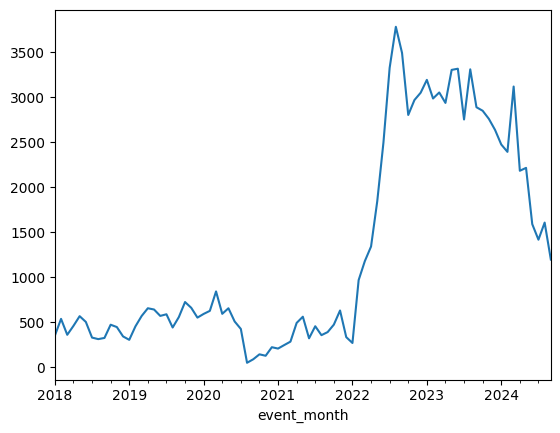

In [88]:
# monthly level
attack_df['event_month'] = attack_df['event_date'].dt.to_period('M')
attack_df.groupby('event_month').size().plot()

In [89]:
attack_df.groupby('actor1_ntnlty').size()

actor1_ntnlty
OTHER         66
RUSSIA     74144
UKRAINE    28669
dtype: int64

In [16]:
# date, location, fatalities are very accurate
# attack_df[['actor1_ntnlty', 'actor2_ntnlty', 'location', 'country', 'fatalities', "notes"]].head(200)

In [17]:
# attack_df[attack_df['notes'].str.contains('shelling')][['actor1', 'actor2', 'notes']]

In [91]:
attack_df[attack_df['notes'].str.contains('missile')][['actor1', 'actor2', 'notes']].head(200)

,actor1,actor2,notes
167,Military Forces of Russia (2000-),NaN,"On 27 September 2024, Russian forces launched ''Iskander-M' ballistic missiles at Dnipro, Dnipropetrovsk. Casualties unknown."
291,Military Forces of Russia (2000-),NaN,"On 27 September 2024, Russian forces launched ''Iskander-M' ballistic missiles at Zaporizhia, Zaporizhia. Casualties unknown."
405,Military Forces of Ukraine (2019-),Military Forces of Ukraine (2019-),"Around 26 September 2024 (as reported), according to the Russian sources, Ukrainian forces using a anti-tank guided missiles (likely shoulder fired) struck other Ukrainian forces, that were attempting to surrender by flying the white flag on the APC near the village of Veseloe (Glushkovskiy, Kursk). The APC was destroyed. Casualties unknown."
461,Military Forces of Russia (2000-),NaN,"On 26 September 2024, Russian Forces struck Dnipro, Dnipropetrovsk, with a ballistic missile. A fire broke out as a result. Casualties unknown."
1008,Military Forces of Ukraine (2019-),Civilians (Russia),"On 24 September 2024, Ukrainian military carried out (likely) missile strikes on the city of Belgorod (Belgorod). In addition to the direct impact, Russian military intercepted some of the missiles causing the debris to fall. 6 civilians were injured, 1 apartment building, 75 houses, 1 garage, 14 outbuildings, 37 cars, gas pipes, water pipes and power lines were damaged. A dry grass patch fire was later extinguished."
1009,Military Forces of Ukraine (2019-),NaN,"On 24 September 2024, Ukrainian military carried out (likely) missile strikes on the village of Severnyi (Belgorodskiy, Belgorod). In addition to the direct impact, Russian military intercepted some of the missiles causing the debris to fall. No casualties, 1 'social object' was damaged."
1444,Military Forces of Russia (2000-),NaN,"On 23 September 2024, Russian forces conducted a S-300 missile strike near Khotin, Sumy. Casualties unknown."
1452,Military Forces of Russia (2000-),NaN,"On 23 September 2024, Russian forces conducted a S-300 missile strike near Korshachyna, Sumy. Casualties unknown."
1474,Military Forces of Russia (2000-),NaN,"On 23 September 2024, Russian force conducted an attack with an unidentified weapons system (coded as shelling/artillery/missile attack) near Marhanets, Dnipropetrovsk. A civilian was wounded in Russian attacks on Nikopol, Myrivske, Marhanets, and Pokrovske (coded to Nikopol)."
1482,Military Forces of Russia (2000-),NaN,"On 23 September 2024, Russian force conducted an attack with an unidentified weapons system (coded as shelling/artillery/missile attack) near Myrivske, Dnipropetrovsk. A civilian was wounded in Russian attacks on Nikopol, Myrivske, Marhanets, and Pokrovske (coded to Nikopol)."


In [167]:
# does {word} exist?

attack_keywords = ['shelling', 'artillery', 'missile', 'mortar']

# indicator to stop searching for missile types
stoppers = ['launched', 'out', 'fired', 'ukrain', 'russia', 'likely', 'with', 'mortar', 'artillery', 'suspected', 'intercepted', 'conducted']
articles = ['a', 'an', 'the', 'one', 'two', 'three', 'some']

# type of missile

for e in attack_keywords:
    attack_df[f'{e}_flag'] = False

attack_df['missile_type'] = ''

for idx, r in attack_df.iterrows():
    tmp_list = r.notes.lower().split(' ')
    i = 0
    for p in tmp_list:
        for e in attack_keywords:
            if e in p:
                attack_df.at[idx, f'{e}_flag'] = True
                if e == 'missile' and p != 'shelling/artillery/missile':
                    # try search for model
                    n_lookback = 5
                    model = ''
                    for j in range(1, n_lookback+1):
                        curr_word = tmp_list[i-j]
                        stop_flag = False
                        for stp in stoppers:
                            if stp in curr_word:
                                stop_flag = True
                        if stop_flag == True or curr_word in articles or curr_word.isdigit():
                            break
                        else:
                            model = curr_word + ' ' + model
                    if model[:4] == 'and ': model = model[4:]
                    attack_df.at[idx, 'missile_type'] = model.replace("""'""",'').strip()
        i += 1

/var/folders/m1/y50gr9tn5796vpljdx0my4sc0000gn/T/ipykernel_5961/143421527.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_df[f'{e}_flag'] = False
/var/folders/m1/y50gr9tn5796vpljdx0my4sc0000gn/T/ipykernel_5961/143421527.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_df['missile_type'] = ''


In [163]:
len(attack_df[attack_df['missile_flag'] == True].groupby(['missile_type']).size())

282

In [164]:
len(attack_df[attack_df['missile_flag'] == True])

3404

In [165]:
attack_df[attack_df['missile_flag'] == True].groupby(['missile_type']).size().sort_values(ascending = False)

missile_type
                                                      1698
bm-21 grad                                             241
anti-tank guided                                       181
himars                                                 147
s-300                                                  125
grad                                                   109
uragan                                                  58
iskander                                                58
mlrs                                                    53
anti-tank                                               42
c-300                                                   36
ballistic                                               28
tochka u                                                24
iskander-m                                              19
kalibr                                                  16
smerch                                                  15
152mm                                      

In [168]:
attack_df[attack_df['missile_type'].str.contains('anti')][['missile_type']]
missile_catgs = ['anti-tank', 'anti-aircraft', 'anti-ship', 'anti-air', 'anti-radar']
for e in missile_catgs:
    attack_df[e] = attack_df['missile_type'].str.contains(e) | attack_df['missile_type'].str.contains(e.replace('-', ''))

/var/folders/m1/y50gr9tn5796vpljdx0my4sc0000gn/T/ipykernel_5961/1258821816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_df[e] = attack_df['missile_type'].str.contains(e) | attack_df['missile_type'].str.contains(e.replace('-', ''))


In [169]:
attack_df[attack_df['missile_flag'] == True][['notes'] + list(attack_df.columns[-8:])].head(200)

,notes,missile_flag,mortar_flag,missile_type,anti-tank,anti-aircraft,anti-ship,anti-air,anti-radar
167,"On 27 September 2024, Russian forces launched ''Iskander-M' ballistic missiles at Dnipro, Dnipropetrovsk. Casualties unknown.",True,False,iskander-m ballistic,False,False,False,False,False
291,"On 27 September 2024, Russian forces launched ''Iskander-M' ballistic missiles at Zaporizhia, Zaporizhia. Casualties unknown.",True,False,iskander-m ballistic,False,False,False,False,False
405,"Around 26 September 2024 (as reported), according to the Russian sources, Ukrainian forces using a anti-tank guided missiles (likely shoulder fired) struck other Ukrainian forces, that were attempting to surrender by flying the white flag on the APC near the village of Veseloe (Glushkovskiy, Kursk). The APC was destroyed. Casualties unknown.",True,False,anti-tank guided,True,False,False,False,False
461,"On 26 September 2024, Russian Forces struck Dnipro, Dnipropetrovsk, with a ballistic missile. A fire broke out as a result. Casualties unknown.",True,False,ballistic,False,False,False,False,False
1008,"On 24 September 2024, Ukrainian military carried out (likely) missile strikes on the city of Belgorod (Belgorod). In addition to the direct impact, Russian military intercepted some of the missiles causing the debris to fall. 6 civilians were injured, 1 apartment building, 75 houses, 1 garage, 14 outbuildings, 37 cars, gas pipes, water pipes and power lines were damaged. A dry grass patch fire was later extinguished.",True,False,,False,False,False,False,False
1009,"On 24 September 2024, Ukrainian military carried out (likely) missile strikes on the village of Severnyi (Belgorodskiy, Belgorod). In addition to the direct impact, Russian military intercepted some of the missiles causing the debris to fall. No casualties, 1 'social object' was damaged.",True,False,,False,False,False,False,False
1444,"On 23 September 2024, Russian forces conducted a S-300 missile strike near Khotin, Sumy. Casualties unknown.",True,False,s-300,False,False,False,False,False
1452,"On 23 September 2024, Russian forces conducted a S-300 missile strike near Korshachyna, Sumy. Casualties unknown.",True,False,s-300,False,False,False,False,False
1474,"On 23 September 2024, Russian force conducted an attack with an unidentified weapons system (coded as shelling/artillery/missile attack) near Marhanets, Dnipropetrovsk. A civilian was wounded in Russian attacks on Nikopol, Myrivske, Marhanets, and Pokrovske (coded to Nikopol).",True,False,,False,False,False,False,False
1482,"On 23 September 2024, Russian force conducted an attack with an unidentified weapons system (coded as shelling/artillery/missile attack) near Myrivske, Dnipropetrovsk. A civilian was wounded in Russian attacks on Nikopol, Myrivske, Marhanets, and Pokrovske (coded to Nikopol).",True,False,,False,False,False,False,False


In [174]:
attack_df[attack_df['missile_flag'] == True].groupby(['missile_type']).size().sort_values(ascending = False).head(25)

missile_type
                        1709
bm-21 grad               241
anti-tank guided         181
himars                   147
s-300                    126
grad                     109
uragan                    58
iskander                  58
mlrs                      53
anti-tank                 42
c-300                     36
ballistic                 29
tochka u                  24
iskander-m                19
kalibr                    16
152mm                     15
smerch                    15
tochka-u                  14
unidentified              13
storm shadow              12
s-300 anti-aircraft       12
grad and uragan           12
high-precision            12
m142 himars               11
missiles, bm-21 grad      11
dtype: int64

In [175]:
# last filter 
missile_topkey = ['grad', 'himars', 's-300', 'grad', 'uragan', 'iskander','c-300', 'mlrs', 'ballistic', 'tochka', 'smerch', 'kalibr', 'high-precision', 'storm shadow']
for e in missile_topkey:
    attack_df[e.replace(' ', '-')] = attack_df['missile_type'].str.contains(e)

/var/folders/m1/y50gr9tn5796vpljdx0my4sc0000gn/T/ipykernel_5961/3177019882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_df[e.replace(' ', '-')] = attack_df['missile_type'].str.contains(e)
/var/folders/m1/y50gr9tn5796vpljdx0my4sc0000gn/T/ipykernel_5961/3177019882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attack_df[e.replace(' ', '-')] = attack_df['missile_type'].str.contains(e)
/var/folders/m1/y50gr9tn5796vpljdx0my4sc0000gn/T/ipykernel_5961/3177019882.py:4: SettingWithCopyWarning: 
A 

In [178]:
attack_df[attack_df['missile_flag'] == True].head(50)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,actor1_ntnlty,actor2_ntnlty,event_month,shelling_flag,artillery_flag,missile_flag,mortar_flag,missile_type,anti-tank,anti-aircraft,anti-ship,anti-air,anti-radar,grad,himars,s-300,uragan,iskander,c-300,mlrs,ballistic,tochka,smerch,kalibr,high-precision,storm-shadow
167,UKR185765,2024-09-27,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,External/Other forces,NaN,NaN,NaN,External/Other forces only,NaN,804,Europe,Ukraine,Dnipropetrovsk,Dniprovskyi,Dniprovska,Dnipro,48.4593,35.0386,1,24 Channel,National,"On 27 September 2024, Russian forces launched ''Iskander-M' ballistic missiles at Dnipro, Dnipropetrovsk. Casualties unknown.",0,NaN,1727819878,RUSSIA,NO_ACTOR,2024-09,False,False,True,False,iskander-m ballistic,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
291,UKR185889,2024-09-27,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,External/Other forces,NaN,NaN,NaN,External/Other forces only,NaN,804,Europe,Ukraine,Zaporizhia,Zaporizkyi,Zaporizka,Zaporizhia,47.8479,35.1602,1,24 Channel,National,"On 27 September 2024, Russian forces launched ''Iskander-M' ballistic missiles at Zaporizhia, Zaporizhia. Casualties unknown.",0,NaN,1727819878,RUSSIA,NO_ACTOR,2024-09,False,False,True,False,iskander-m ballistic,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
405,RUS23807,2024-09-26,2024,2,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),NaN,External/Other forces,Military Forces of Ukraine (2019-),NaN,External/Other forces,External/Other forces-External/Other forces,NaN,643,Europe,Russia,Kursk,Glushkovskiy,NaN,Veseloe,51.2880,34.5481,2,Argumenty I Fakty,National,"Around 26 September 2024 (as reported), according to the Russian sources, Ukrainian forces using a anti-tank guided missiles (likely shoulder fired) struck other Ukrainian forces, that were attempting to surrender by flying the white flag on the APC near the village of Veseloe (Glushkovskiy, Kursk). The APC was destroyed. Casualties unknown.",0,NaN,1727805810,UKRAINE,UKRAINE,2024-09,False,False,True,False,anti-tank guided,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
461,UKR185589,2024-09-26,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Russia (2000-),NaN,External/Other forces,NaN,NaN,NaN,External/Other forces only,NaN,804,Europe,Ukraine,Dnipropetrovsk,Dniprovskyi,Dniprovska,Dnipro,48.4593,35.0386,1,Liveuamap; Telegram,Local partner-New media,"On 26 September 2024, Russian Forces struck Dnipro, Dnipropetrovsk, with a ballistic missile. A fire broke out as a result. Casualties unknown.",0,NaN,1727819877,RUSSIA,NO_ACTOR,2024-09,False,False,True,False,ballistic,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1008,RUS23640,2024-09-24,2024,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),NaN,External/Other forces,Civilians (Russia),NaN,Civilians,External/Other forces-Civilians,Civilian targeting,643,Europe,Russia,Belgorod,Belgorod,NaN,Belgorod,50.6107,36.5802,1,Telegram,New media,"On 24 September 2024, Ukrainian military carried out (likely) missile strikes on the city of Belgorod (Belgorod). In addition to the direct impact, Russian military intercepted some of the missiles causing the debris to fall. 6 civilians

In [179]:
attack_df.to_csv('processed_table/air_attack.csv')

Disrupted weapon used
- Mine for number of drones/missiles being intercepted(also their model, if any)
Airdrone strike
- Air strike or Drone strike
- (opt.) equipment
Armed Clash
- (opt.) supported by any weapon/support types?
Shelling
- done already,look for aviation support
- type of missile
Government regain territory
- no worries

Goal: Identify for severity


- 